# Check data retrieved from AWS S3 to test data logger installed in the field

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

## This cell specifies what site we are dealing with; edit this as required

In [2]:
logger = 'lowertemaari'
# logger = 'infernocratertest'
# logger = 'foxglacierlandslide'

In [3]:
#base directory for data
base = '/home/sherburn/Work/GeoNet/datalogger/auto_download'

## Reading and preparing data

### Split data file into like parts.

Some sites will have changes to instruments and this may change numbers of columns as well as column content

This will cause issues reading the file into a dataframe, as further header lines and number of columns will cause an error.

In [4]:
#remove any remaining split files
try:
    files = glob.glob('xx*')
    for file in files:
        os.remove(file)
except:
    pass
              
loggerfile = os.path.join(base, logger,logger+'_Table1.csv')
    
#split file so one part for each header line
cmd = 'csplit -z '+loggerfile+' /RecNbr/ {*}'
os.system(cmd)

files = glob.glob('xx*')
files.sort()
loggerfile = files[-1]
print (logger+' datafile contains '+str(len(files))+' components, displaying the only the most recent')

lowertemaari datafile contains 1 components, displaying the only the most recent


### Read data

In [5]:
data = (pd.read_csv(loggerfile, 
        parse_dates=True,
        index_col = 'Time',
        na_values='NAN'))
data.head()

,RecNbr,LithiumVolts,LoggerName,PTemp_degC,SupplyVolts,Temp_thermocouple1_degC,Temp_thermocouple2_degC,nmbr_satellites_Avg
Time,,,,,,,,
2020-04-01 00:00:00+00:00,9942,3.674,LowerTeMaari,15.800000,13.79,46.400002,11.65,8.0
2020-04-01 00:10:00+00:00,9943,3.676,LowerTeMaari,15.960000,13.80,46.410000,11.75,7.5
2020-04-01 00:20:00+00:00,9944,3.677,LowerTeMaari,16.120001,13.80,46.369999,11.80,7.0
2020-04-01 00:30:00+00:00,9945,3.675,LowerTeMaari,16.299999,13.79,46.419998,11.89,7.0
2020-04-01 00:40:00+00:00,9946,3.675,LowerTeMaari,16.469999,13.79,46.279999,11.96,7.0


In [6]:
#test, show data within some time interval
# data.loc['2019-07-03 02':'2019-07-03 03']

In [7]:
data.tail()

,RecNbr,LithiumVolts,LoggerName,PTemp_degC,SupplyVolts,Temp_thermocouple1_degC,Temp_thermocouple2_degC,nmbr_satellites_Avg
Time,,,,,,,,
2020-06-23 02:10:00+00:00,21907,3.668,LowerTeMaari,11.39,13.92,45.090000,6.962,6.0
2020-06-23 02:20:00+00:00,21908,3.673,LowerTeMaari,11.36,13.92,45.110001,7.025,5.0
2020-06-23 02:30:00+00:00,21909,3.669,LowerTeMaari,11.31,13.87,45.180000,7.099,5.0
2020-06-23 02:40:00+00:00,21910,3.671,LowerTeMaari,11.26,13.87,44.959999,7.147,5.0
2020-06-23 02:50:00+00:00,21911,3.668,LowerTeMaari,11.20,13.88,45.049999,7.188,5.0


## Displaying data

### Plot supply voltage, do this for every logger site

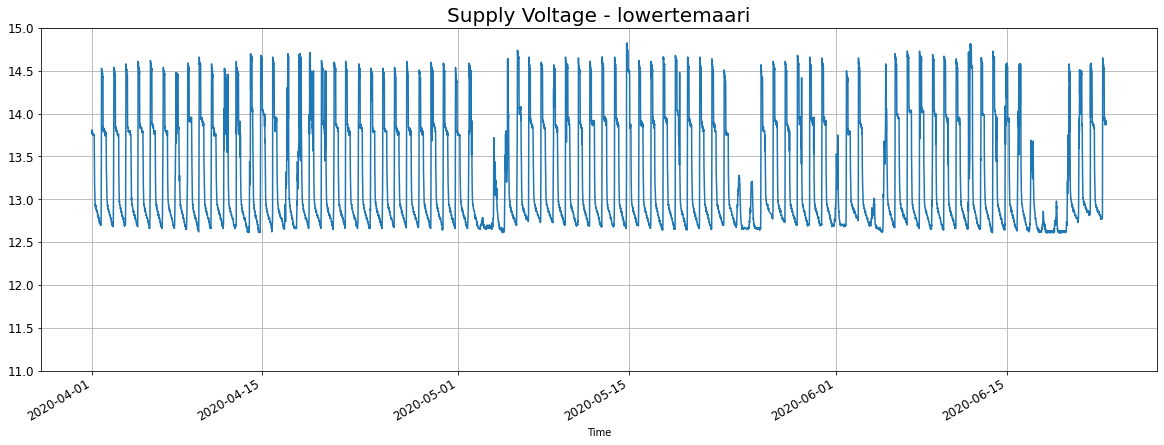

In [8]:
vol = data['SupplyVolts'].plot(figsize=(20,7), title='Supply Voltage - '+logger, fontsize=12)
vol.title.set_size(20)
vol.grid()
vol.set_ylim(11,15)

fig = vol.get_figure()
fig.savefig(os.path.join(base, logger, logger+'_field_logger_voltage.png'), dpi=100, bbox_inches='tight')

### Do different things for each logger data set

#### Inferno Crater

In [9]:
if logger == 'infernocratertest':
    data['tdif'] = data['Temp_thermocouple1_degC'] - data['Temp_thermocouple2_degC']
#     maxdist = data['RadarDistance_Meters'].max()
#     print(maxdist)
    
#     data['overflow_depth'] = maxdist - data['RadarDistance_Meters']

In [10]:
data.head()

,RecNbr,LithiumVolts,LoggerName,PTemp_degC,SupplyVolts,Temp_thermocouple1_degC,Temp_thermocouple2_degC,nmbr_satellites_Avg
Time,,,,,,,,
2020-04-01 00:00:00+00:00,9942,3.674,LowerTeMaari,15.800000,13.79,46.400002,11.65,8.0
2020-04-01 00:10:00+00:00,9943,3.676,LowerTeMaari,15.960000,13.80,46.410000,11.75,7.5
2020-04-01 00:20:00+00:00,9944,3.677,LowerTeMaari,16.120001,13.80,46.369999,11.80,7.0
2020-04-01 00:30:00+00:00,9945,3.675,LowerTeMaari,16.299999,13.79,46.419998,11.89,7.0
2020-04-01 00:40:00+00:00,9946,3.675,LowerTeMaari,16.469999,13.79,46.279999,11.96,7.0


In [11]:
if logger == 'infernocratertest':
    fig,(ax0,ax1,ax2,ax3,ax4, ax5) = plt.subplots(6, 1, figsize=(20,25))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Crater Water Temperature - '+logger, fontsize=12)
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
#     ax0.set_ylim(bottom=40)
        
    data['Depth_USGS_OTT_meters'].plot(ax=ax1, title='Crater Water Depth (Above Sensor) - '+logger, fontsize=12)
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel("Depth (m)")
#     ax1.set_ylim(top=11, bottom=1)
    
    data['Temp_thermocouple2_degC'].plot(ax=ax2, title='Overflow Water Temperature - '+logger, fontsize=12)
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')

#     data['overflow_depth'].plot(ax=ax3, title='Overflow Water Depth - '+logger, fontsize=12)
    data['RadarDistance_Meters'].plot(ax=ax3, title='Overflow Water Depth - '+logger, fontsize=12)
    ax3.title.set_size(20)
    ax3.grid()
    ax3.set_ylabel('Depth (m)')
    ax3.set_xlabel('')
#     ax3.set_ylim(bottom=-0.05, top=0.5)
    
    data['PTemp_degC'].plot(ax=ax4, title='Box Temperature - '+logger, fontsize=12)
    ax4.title.set_size(20)
    ax4.grid()
    ax4.set_ylabel('Temperature (deg C)')
    ax4.set_xlabel('')
    
    data['tdif'].plot(ax=ax5, title='Excess measured temperature, crater over overflow - '+logger, fontsize=12)
    ax5.title.set_size(20)
    ax5.grid()
    ax5.set_ylabel('Temperature (deg C)')
    ax5.set_xlabel('')
    ax5.set_ylim(bottom=-2, top=5)
         
    fig.savefig(os.path.join(base, logger, logger+'_field_logger.png'), dpi=100, bbox_inches='tight')

#### Lower Te Maari

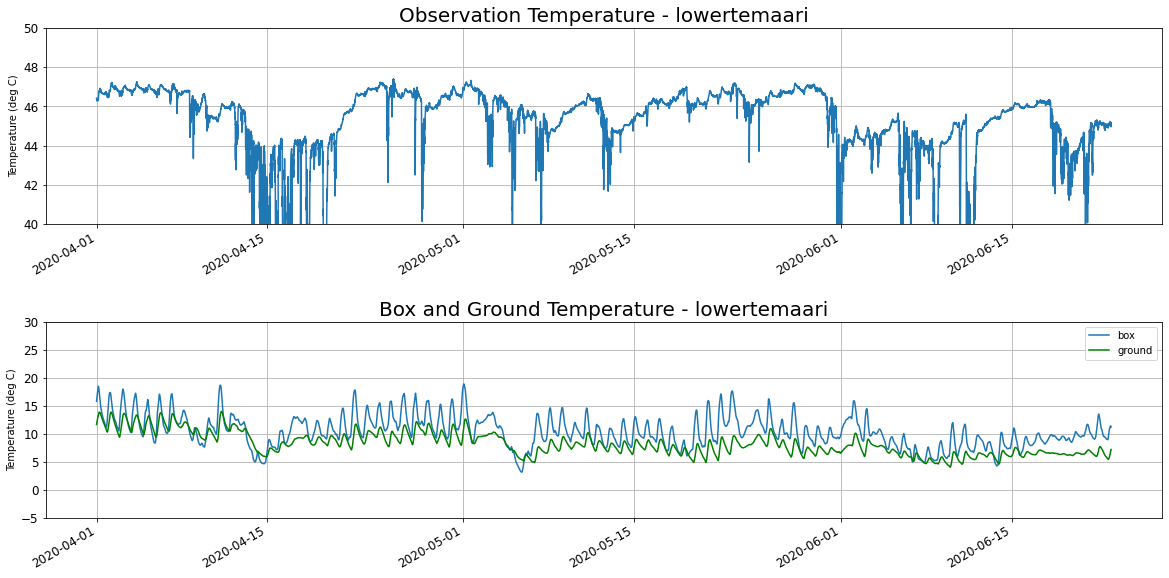

In [13]:
if logger == 'lowertemaari':
    fig,(ax0, ax1) = plt.subplots(2, 1, figsize=(20,10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Observation Temperature - '+logger, fontsize=12)
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(40,50)

    data['PTemp_degC'].plot(ax=ax1, title='Box and Ground Temperature - '+logger, fontsize=12, label='box')
    data['Temp_thermocouple2_degC'].plot(color='green', label='ground')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    ax1.set_ylim(top=30,bottom=-5)
    plt.legend(loc='best')
    
    fig.savefig(os.path.join(base, logger, logger+'_field_logger.png'), dpi=100, bbox_inches='tight')

#### Upper Te Maari

In [85]:
if logger == './UpperTeMaari/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_thermocouple2_degC'].plot(ax=ax0, title='Temperature Eastern Feature - '+logger, fontsize=12)
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(bottom=45)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax1, title='Temperature Southern Feature - '+logger, fontsize=12)
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_ylim(bottom=90)
        
    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature - '+logger, fontsize=12)
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')
    
    fig.savefig(directory+logger+'_field_logger.png', dpi=100, bbox_inches='tight')

#### Fumarole 13

In [86]:
if logger == './Fumarole13/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    #feature 1, eastern
    data['Temp_PRT1_degC'].plot(ax=ax0, title='Observation Temperature Eastern Feature - '+logger, fontsize=12, label='PRT')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.legend(loc='best')
    
    #feature 2, western
    data['Temp_thermocouple2_degC'].plot(ax=ax1, title='Observation Temperature Western Feature - '+logger, fontsize=12, label='HiT thermocouple')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=90)
    ax1.legend(loc='best')
    
    #box and air temperatures
    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature - '+logger, fontsize=12, label='logger')
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')
    
    data['Temp_thermocouple1_degC'].plot(ax=ax2, label='box thermocouple')
    ax2.legend(loc='best')
    
    fig.savefig(directory+logger+'_field_logger.png', dpi=100, bbox_inches='tight')

#### Ruapehu Crater Lake

In [87]:
if logger == './RuapehuCraterLake/':
    fig,(ax0, ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Observation Temperature - '+logger, fontsize=12)
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature - '+logger, fontsize=12)
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    
    data['Depth_USGS_OTT_meters'].plot(ax=ax2, title='Water Depth Above Sensor - '+logger, fontsize=12)
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel("Depth (m)")
    ax2.set_ylim(top=1.5, bottom=0)
    
    fig.savefig(directory+logger+'_field_logger.png', dpi=100, bbox_inches='tight')

#### Upper Tama

In [88]:
if logger == './UpperTama/':
    fig,(ax0,ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    #PRT sensor
    data['Temp_PRT_degC'].plot(ax=ax0, title='Observation Temperature - '+logger, fontsize=12, label='PRT')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(bottom=5)
    
    #CS456 sensor
    data['Temp_CS456_degC'].plot(ax=ax0, label='CS456')
    ax0.legend(loc='best')
    
    #box temperatures
    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature - '+logger, fontsize=12, label='logger')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    
    data['Depth_CS456_meters'].plot(ax=ax2, title='Water Depth Above Sensor - '+logger, fontsize=12)
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel("Depth (m)")
    ax2.set_ylim(top=1.25, bottom=0.5)
    
    fig.savefig(directory+logger+'_field_logger.png', dpi=100, bbox_inches='tight')

#### Fox Landslide

In [89]:
if logger == 'foxglacierlandslide':
    fig,(ax0, ax1, ax2,ax3) = plt.subplots(4, 1, figsize=(20,20))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['PTemp_degC'].plot(ax=ax0, title='Box Temperature - '+logger, fontsize=12)
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(top=30, bottom=-5)
    
    ax1.vlines(data.index, ymax=data['Rain1_mm_Tot'], ymin=0, color='blue')
    ax1.set_ylabel('Rainfall (mm)')
    ax1.set_title('Rainfall Sensor 1')
    ax1.title.set_size(20)
    ax1.grid()

    ax2.vlines(data.index, ymax=data['Rain2_mm_Tot'], ymin=0, color='blue')
    ax2.set_ylabel('Rainfall (mm)')
    ax2.set_title('Rainfall Sensor 2')
    ax2.title.set_size(20)
    ax2.grid()
    
    #daily rainfall totals
    daily = data['Rain1_mm_Tot'].resample('D').sum()
    ax3.vlines(daily.index, ymax=daily, ymin=0, color='blue')
    ax3.set_ylabel('Rainfall (mm)')
    ax3.set_title('Rainfall Sensor 1, Daily Total (UTC Day)')
    ax3.title.set_size(20)
    ax3.grid()

    fig.savefig(os.path.join(base, logger, logger+'_field_logger.png'), dpi=100, bbox_inches='tight')

#### Fox Landslide Position

In [90]:
if (logger == 'foxglacierlandslide'):
    colors = np.arange(data.shape[0])
    
    data['longitude'] = data['longitude_a'] + data['longitude_b']/60
    data['latitude'] = data['latitude_a'] + data['latitude_b']/60
    
    medlon = data.longitude.median()
    medlat = data.latitude.median()
    halfrange = 0.0002
    latmin = medlat - halfrange
    latmax = medlat + halfrange
    lonmin = medlon - halfrange
    lonmax = medlon + halfrange
    
    fig = plt.figure(figsize=(10,10))
#     plt.plot(data['longitude'], data['latitude'], marker='None', color=colors, alpha=0.2)
    plt.scatter(data['longitude'], data['latitude'], c=colors, edgecolors='None', s=5, cmap='cool')
    plt.colorbar(label='Data point order')

    plt.title('Apparent Position of Datalogger')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    
    plt.xlim(lonmin, lonmax)
    plt.ylim(latmin, latmax)

    fig.savefig(os.path.join(base, logger, logger+'_field_logger_position.png'), dpi=100, bbox_inches='tight')